In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import statsmodels.tsa.api as smt
from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
filename = "/Users/Patcharagit.Strauss/Desktop/test/sales.csv"

In [3]:
def read_file(file):
    names = [
        "SalesOrderID",
        "SalesOrderDetailID",
        "CarierTrakcingNumber",
        "OrderQty",
        "ProductID",
        "SpecialOfferID",
        "UnitPrice",
        "UnitPriceDiscount",
        "LineTotal",
        "rowguid",
        "ModifiedDate",
    ]

    df = pd.read_csv(
        file,
        skiprows=0,
        header=None,
        names=names,
        quotechar='"',
        delimiter=",",
        index_col=False,
        dtype=str,
        na_values=[],
        keep_default_na=False,
        skipinitialspace=True,
    )

    return df

In [4]:
df = read_file(filename)

In [5]:
df.head(5)

,SalesOrderID,SalesOrderDetailID,CarierTrakcingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.9940,0.0000,2024.994000,b207c96d-d9e6-402b-8470-2cc176c42283,2011-05-31 00:00:00
1,43659,2,4911-403C-98,3,777,1,2024.9940,0.0000,6074.982000,7abb600d-1e77-41be-9fe5-b9142cfc08fa,2011-05-31 00:00:00
2,43659,3,4911-403C-98,1,778,1,2024.9940,0.0000,2024.994000,475cf8c6-49f6-486e-b0ad-afc6a50cdd2f,2011-05-31 00:00:00
3,43659,4,4911-403C-98,1,771,1,2039.9940,0.0000,2039.994000,04c4de91-5815-45d6-8670-f462719fbce3,2011-05-31 00:00:00
4,43659,5,4911-403C-98,1,772,1,2039.9940,0.0000,2039.994000,5a74c7d2-e641-438e-a7ac-37bf23280301,2011-05-31 00:00:00


In [6]:
df['OrderQty'] = pd.to_numeric(df['OrderQty'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])
df['UnitPriceDiscount'] = pd.to_numeric(df['UnitPriceDiscount'])
df['LineTotal'] = pd.to_numeric(df['LineTotal'])

In [7]:
df.dtypes

SalesOrderID             object
SalesOrderDetailID       object
CarierTrakcingNumber     object
OrderQty                  int64
ProductID                object
SpecialOfferID           object
UnitPrice               float64
UnitPriceDiscount       float64
LineTotal               float64
rowguid                  object
ModifiedDate             object
dtype: object

In [8]:
sns.set()

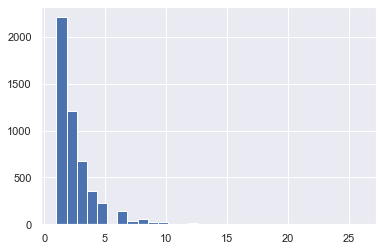

In [9]:
df['OrderQty'].hist(bins=30);

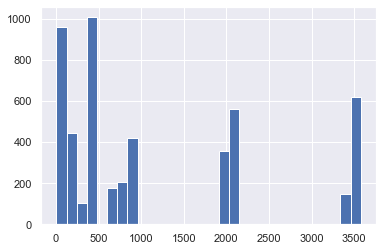

In [10]:
df['UnitPrice'].hist(bins=30);

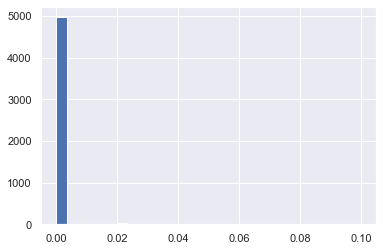

In [11]:
df['UnitPriceDiscount'].hist(bins=30);

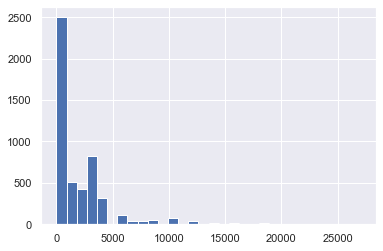

In [12]:
df['LineTotal'].hist(bins=30);

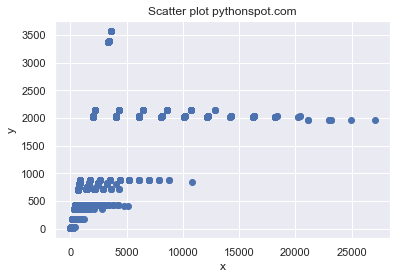

In [13]:
plt.scatter(df['LineTotal'], df['UnitPrice'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], infer_datetime_format=True)

In [15]:
df = df.set_index('ModifiedDate')

In [16]:
df.head(5)

,SalesOrderID,SalesOrderDetailID,CarierTrakcingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid
ModifiedDate,,,,,,,,,,
2011-05-31,43659,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,b207c96d-d9e6-402b-8470-2cc176c42283
2011-05-31,43659,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7abb600d-1e77-41be-9fe5-b9142cfc08fa
2011-05-31,43659,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475cf8c6-49f6-486e-b0ad-afc6a50cdd2f
2011-05-31,43659,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04c4de91-5815-45d6-8670-f462719fbce3
2011-05-31,43659,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5a74c7d2-e641-438e-a7ac-37bf23280301


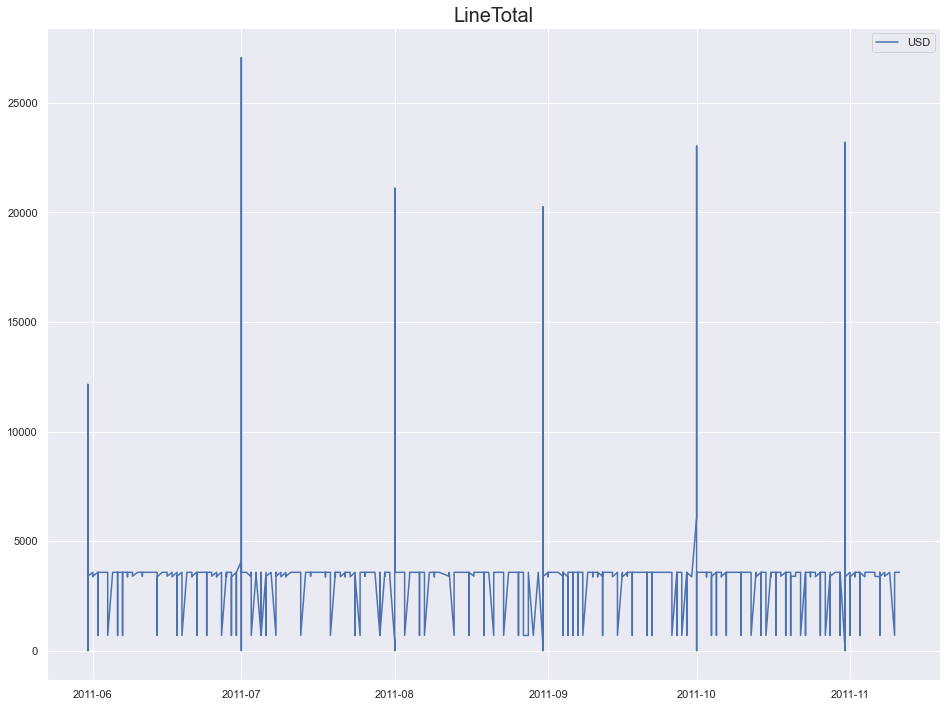

In [17]:
#Visualizing code
plt.figure(figsize=(16, 12))

ax = plt.axes()
ax.set_title('LineTotal', fontsize=20)
ax.plot(df['LineTotal'], label= 'USD');
ax.legend()

In [18]:
x = df['LineTotal'].resample('MS').mean()

In [19]:
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
model = ARMA(x, order=(0,1))
model_ARMA = model.fit(disp=False)
y1= model_ARMA.predict()

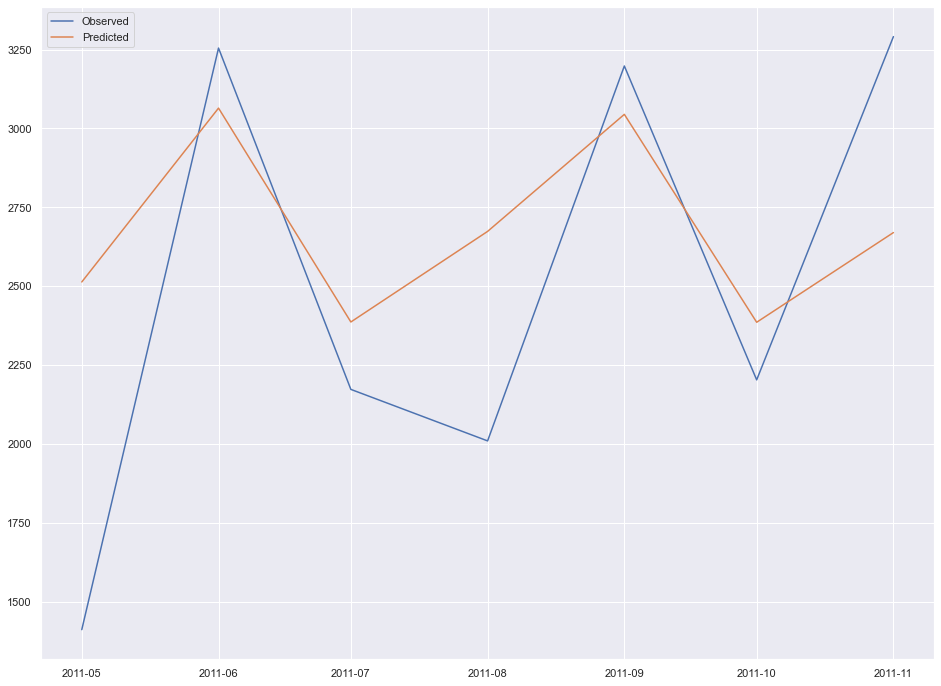

In [20]:
#Visualizing code
plt.figure(figsize=(16, 12))

plt.plot(x, label='Observed')
plt.plot(y1, label='Predicted')

plt.legend();

In [21]:
#Execution Code
y_true = x
y_pred_ARMA = model_ARMA.predict() 

#Fiding the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Finding the MAPA
Accuracy_ARMA = 100 - mean_absolute_percentage_error(y_true, y_pred_ARMA)

print('ARMA: ',Accuracy_ARMA)

ARMA:  77.3170482327391


In [22]:
print(model_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:              LineTotal   No. Observations:                    7
Model:                     ARMA(0, 1)   Log Likelihood                 -53.704
Method:                       css-mle   S.D. of innovations            447.891
Date:                Thu, 12 Mar 2020   AIC                            113.408
Time:                        15:08:37   BIC                            113.246
Sample:                    05-01-2011   HQIC                           111.403
                         - 11-01-2011                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2513.3326     69.111     36.367      0.000    2377.877    2648.788
ma.L1.LineTotal    -1.0000      0.438     -2.283      0.022      -1.859      -0.141
                                

In [23]:
#Execution Code

#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [24]:
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
def optimize_SARIMA(parameters_list, d, D, s):
    
    results = [pd.np.empty((2))]
    
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = SARIMAX(x, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            model_SARIMA = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s);

In [25]:
#Exectution Code

#Set parameters that give the lowest AIC (Akaike Information Criteria)

p, q, P, Q = result_table.parameters[1]

model_SARIMA = SARIMAX(x, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=False)

In [26]:
y2 = model_SARIMA.predict()

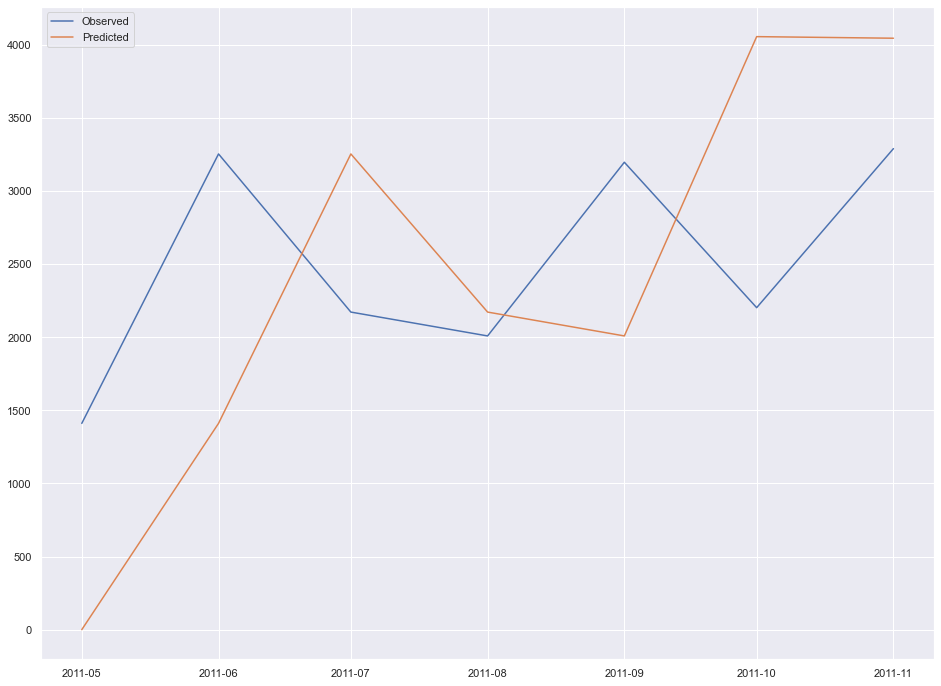

In [27]:
#Visualizing code
plt.figure(figsize=(16, 12))

plt.plot(x, label='Observed')
plt.plot(y2, label='Predicted')

plt.legend();

In [28]:
#Execution Code
y_true = x
y_pred_SARIMA = model_SARIMA.predict()

#Fiding the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Finding the MAPA
Accuracy_SARIMA = 100 - mean_absolute_percentage_error(y_true, y_pred_SARIMA)

print('SARIMA: ',Accuracy_SARIMA)

SARIMA:  48.73565955998901


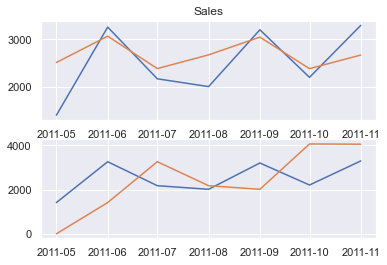

In [29]:
#Visualizing code

fig,ax = plt.subplots(2)

ax[0].set_title('Sales')

ax[0].plot(x)
ax[0].plot(y1)
ax[1].plot(x)
ax[1].plot(y2)

plt.show()

In [30]:
print(model_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         LineTotal   No. Observations:                    7
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 5)   Log Likelihood                  -8.046
Date:                           Thu, 12 Mar 2020   AIC                             18.093
Time:                                   15:08:39   BIC                             16.093
Sample:                               05-01-2011   HQIC                              -inf
                                    - 11-01-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.572e+05   4.61e+07      0.012      0.990   -8.98e+07     9.1e+07
Ljung-Box (Q):                         nan 